In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option("max_columns",1000)
df_train = pd.read_csv('./house/train.csv')
df_test  = pd.read_csv('./house/test.csv')
df_sub   = pd.read_csv('./house/sample_submission.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
concatDf = pd.concat([df_train,df_test])

In [6]:
numCol = []
noNumCol = []
for i in concatDf.columns:
    if concatDf[i].dtype == "object":
        noNumCol.append(i)
    else:
        numCol.append(i)
        
numCol.remove("Id")      
print(numCol)
print(noNumCol)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [7]:
for i in numCol:
    print("{:15}{}".format(i,len(concatDf[i][concatDf[i].isnull().values == True])))

MSSubClass     0
LotFrontage    486
LotArea        0
OverallQual    0
OverallCond    0
YearBuilt      0
YearRemodAdd   0
MasVnrArea     23
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
1stFlrSF       0
2ndFlrSF       0
LowQualFinSF   0
GrLivArea      0
BsmtFullBath   2
BsmtHalfBath   2
FullBath       0
HalfBath       0
BedroomAbvGr   0
KitchenAbvGr   0
TotRmsAbvGrd   0
Fireplaces     0
GarageYrBlt    159
GarageCars     1
GarageArea     1
WoodDeckSF     0
OpenPorchSF    0
EnclosedPorch  0
3SsnPorch      0
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      1459


In [8]:
temp1 = df_train.iloc[df_train["LotFrontage"].isnull().values==False]
a = temp1["LotArea"] / temp1["LotFrontage"]
def LotAreaCvLotFrontage(col):
    LotFrontage = col[0]
    LotArea = col[1]
    if pd.isnull(LotFrontage):
        return LotArea // a.mean()
    else:
        return LotFrontage
    
concatDf["LotFrontage"] = concatDf[["LotFrontage","LotArea"]].apply(LotAreaCvLotFrontage,axis = 1)

In [9]:
for i in numCol:
    if i != "SalePrice" and len(concatDf[i][concatDf[i].isnull().values == True]) != 0:
        concatDf[i].fillna(0,inplace=True)
for i in numCol:
    print("{:15}{}".format(i,len(concatDf[i][concatDf[i].isnull().values == True])))

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
YearBuilt      0
YearRemodAdd   0
MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
LowQualFinSF   0
GrLivArea      0
BsmtFullBath   0
BsmtHalfBath   0
FullBath       0
HalfBath       0
BedroomAbvGr   0
KitchenAbvGr   0
TotRmsAbvGrd   0
Fireplaces     0
GarageYrBlt    0
GarageCars     0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
EnclosedPorch  0
3SsnPorch      0
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      1459


In [11]:
numDf = pd.DataFrame(concatDf,columns=numCol)

x_train = numDf[:df_train.shape[0]].iloc[:,:-1]
y_train = numDf[:df_train.shape[0]].iloc[:,-1:]


In [12]:
import torch
import torch.nn as nn

In [13]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [14]:
H1, H2, H3 = 500, 1000, 200
D_in, D_out = x_train.shape[1], 1

In [15]:
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,73.886986,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,53.322382,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,13.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,82.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,1155.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [16]:
model1 = Net(D_in,H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

In [17]:
losses1 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model1(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 57035617992704.0
1 inf
2 nan


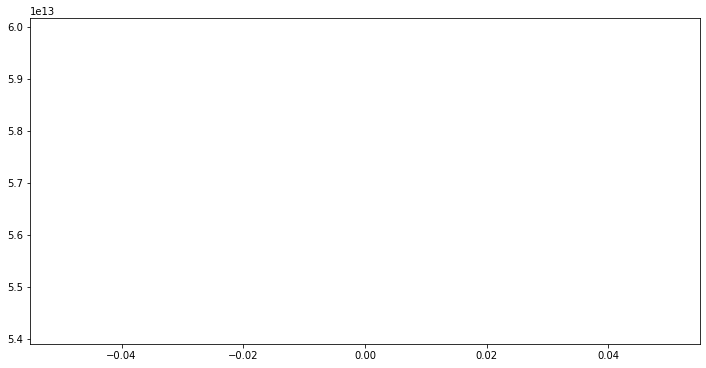

In [18]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(len(losses1)),losses1)

In [19]:
means = {}
maxs = {}
mins = {}
for col in numCol:
    means[col] = numDf[col][:df_train.shape[0]].mean()
    maxs[col] = numDf[col][:df_train.shape[0]].max()
    mins[col] = numDf[col][:df_train.shape[0]].min()  

In [20]:
normalNumDf = (numDf[:df_train.shape[0]] - numDf[:df_train.shape[0]].mean()) / (numDf[:df_train.shape[0]].max() - numDf[:df_train.shape[0]].min())
normalNumDf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.018251,-0.007782,-0.009661,0.100076,-0.071918,0.229943,0.302237,0.058052,0.046485,-0.03158,-0.178613,-0.032967,-0.070360,0.245524,-0.010218,0.036650,0.191553,-0.028767,0.144977,0.308562,0.016695,-0.015525,0.123516,-0.204338,0.066796,0.058219,0.052905,-0.109970,0.026215,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.392902,0.046062,0.038299
1,-0.217043,0.005353,-0.004285,-0.011035,0.303082,0.034291,-0.147763,-0.064448,0.094678,-0.03158,-0.121250,0.033481,0.022802,-0.168035,-0.010218,-0.047751,-0.141781,0.471233,0.144977,-0.191438,0.016695,-0.015525,-0.043151,0.128995,0.053363,0.058219,-0.009154,0.237754,-0.085302,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.120174,-0.203938,0.000804
2,0.018251,-0.005155,0.003427,0.100076,-0.071918,0.215451,0.285571,0.036802,0.007505,-0.03158,-0.057038,-0.022493,-0.055674,0.251335,-0.010218,0.050968,0.191553,-0.028767,0.144977,0.308562,0.016695,-0.015525,-0.043151,0.128995,0.065801,0.058219,0.095219,-0.109970,-0.008520,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,0.243462,0.046062,0.059129
3,0.077075,-0.012160,-0.004519,0.100076,-0.071918,-0.407738,-0.247763,-0.064448,-0.040333,-0.03158,-0.011661,-0.049334,-0.046266,0.198067,-0.010218,0.037968,0.191553,-0.028767,-0.188356,-0.191438,0.016695,-0.015525,0.040183,0.128995,0.064309,0.308219,0.119196,-0.109970,-0.021317,0.452982,-0.006712,-0.031377,-0.003738,-0.002806,-0.392902,-0.453938,-0.056827
4,0.018251,0.008856,0.017496,0.211187,-0.071918,0.208204,0.252237,0.154302,0.037449,-0.03158,-0.033065,0.014332,-0.004045,0.341892,-0.010218,0.128586,0.191553,-0.028767,0.144977,0.308562,0.141695,-0.015525,0.206849,0.128995,0.065304,0.308219,0.256008,0.114067,0.068263,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,0.516189,0.046062,0.095929


In [24]:
x_train = normalNumDf.iloc[:,:-1]
y_train = normalNumDf.iloc[:,-1:]

In [26]:
model2 = Net(D_in,H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-4 )
losses2 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model2(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses2.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 27.770544052124023
1 20.476072311401367
2 18.172271728515625
3 17.359403610229492
4 16.998638153076172
5 16.77684783935547
6 16.598920822143555
7 16.436262130737305
8 16.279767990112305
9 16.127309799194336
10 15.977848052978516
11 15.830973625183105
12 15.686357498168945
13 15.543580055236816
14 15.40304946899414
15 15.264739036560059
16 15.128174781799316
17 14.993173599243164
18 14.859711647033691
19 14.72778034210205
20 14.597033500671387
21 14.467341423034668
22 14.338845252990723
23 14.211386680603027
24 14.085441589355469
25 13.960586547851562
26 13.836731910705566
27 13.713606834411621
28 13.59131145477295
29 13.46988582611084
30 13.349119186401367
31 13.22930908203125
32 13.110464096069336
33 12.992290496826172
34 12.874613761901855
35 12.757684707641602
36 12.641554832458496
37 12.526216506958008
38 12.411691665649414
39 12.297884941101074
40 12.184893608093262
41 12.072768211364746
42 11.961324691772461
43 11.850472450256348
44 11.740303039550781
45 11.630919456481934
46 1

377 3.363145112991333
378 3.3594565391540527
379 3.3557910919189453
380 3.352137565612793
381 3.3485028743743896
382 3.344881057739258
383 3.341270923614502
384 3.3376755714416504
385 3.3341023921966553
386 3.330545663833618
387 3.32700514793396
388 3.3234846591949463
389 3.3199832439422607
390 3.3164992332458496
391 3.31302809715271
392 3.3095762729644775
393 3.3061389923095703
394 3.302720546722412
395 3.299314498901367
396 3.295929431915283
397 3.292555570602417
398 3.2892043590545654
399 3.2858612537384033
400 3.2825350761413574
401 3.279226303100586
402 3.2759346961975098
403 3.272653818130493
404 3.26938533782959
405 3.26613450050354
406 3.262904167175293
407 3.2596845626831055
408 3.2564826011657715
409 3.2532958984375
410 3.250126838684082
411 3.246987819671631
412 3.2438557147979736
413 3.240732192993164
414 3.237614870071411
415 3.234511375427246
416 3.231412410736084
417 3.2283284664154053
418 3.225264310836792
419 3.2222089767456055
420 3.219170570373535
421 3.2161476612091

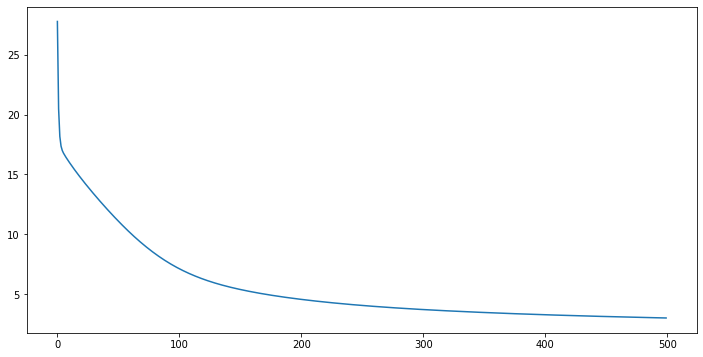

In [27]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(len(losses2)),losses2,label="SGD 1e*4")

In [28]:
model3 = Net(D_in,H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-4 * 2)

losses3 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model3(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses3.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 17.33672332763672
1 16.888099670410156
2 16.53508758544922
3 16.191762924194336
4 15.855789184570312
5 15.526998519897461
6 15.20503044128418
7 14.887722969055176
8 14.574593544006348
9 14.264684677124023
10 13.958393096923828
11 13.655967712402344
12 13.35728645324707
13 13.06132984161377
14 12.768566131591797
15 12.479475975036621
16 12.194998741149902
17 11.914498329162598
18 11.638460159301758
19 11.367125511169434
20 11.101572036743164
21 10.842126846313477
22 10.589005470275879
23 10.34261703491211
24 10.102718353271484
25 9.868799209594727
26 9.641215324401855
27 9.420071601867676
28 9.204933166503906
29 8.996146202087402
30 8.793990135192871
31 8.598234176635742
32 8.408794403076172
33 8.225760459899902
34 8.04940414428711
35 7.879538536071777
36 7.716038227081299
37 7.559008598327637
38 7.408261299133301
39 7.263727188110352
40 7.125187397003174
41 6.9926228523254395
42 6.866054058074951
43 6.745325088500977
44 6.6302056312561035
45 6.520718574523926
46 6.416625499725342
47 

371 2.6834359169006348
372 2.68157696723938
373 2.679724931716919
374 2.6778807640075684
375 2.6760387420654297
376 2.6742007732391357
377 2.6723783016204834
378 2.6705541610717773
379 2.6687419414520264
380 2.6669328212738037
381 2.6651358604431152
382 2.6633379459381104
383 2.661545991897583
384 2.6597578525543213
385 2.6579813957214355
386 2.656205892562866
387 2.654428243637085
388 2.652660369873047
389 2.650893449783325
390 2.6491341590881348
391 2.647378921508789
392 2.645627975463867
393 2.643887758255005
394 2.642148733139038
395 2.6404151916503906
396 2.638685464859009
397 2.6369662284851074
398 2.635244607925415
399 2.633533000946045
400 2.631826877593994
401 2.6301145553588867
402 2.628416061401367
403 2.6267223358154297
404 2.625034809112549
405 2.623352527618408
406 2.621673583984375
407 2.6199934482574463
408 2.6183199882507324
409 2.6166467666625977
410 2.6149821281433105
411 2.613313913345337
412 2.6116528511047363
413 2.609990119934082
414 2.6083362102508545
415 2.6066

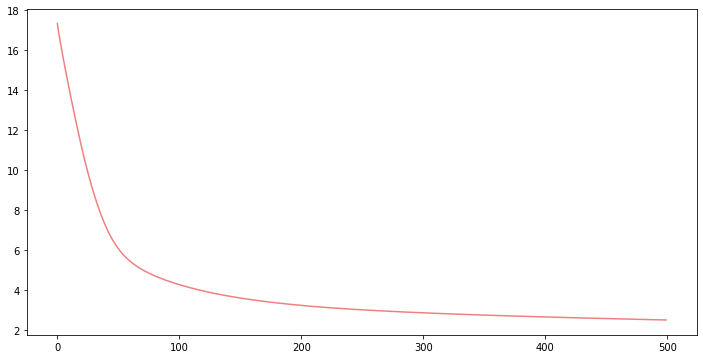

In [29]:
plt.figure(figsize=(12,6))
plt.plot(range(len(losses3)),losses3,color="#F08080")
plt.show()

In [30]:
model4 = Net(D_in,H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4 )

losses4 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model4(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses4.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 18.86589241027832
1 16.984067916870117
2 15.486026763916016
3 14.233002662658691
4 13.109794616699219
5 12.037569999694824
6 10.988441467285156
7 9.976369857788086
8 9.031600952148438
9 8.183321952819824
10 7.450438499450684
11 6.835333347320557
12 6.323458194732666
13 5.902480125427246
14 5.5723466873168945
15 5.335787773132324
16 5.17915678024292
17 5.061846733093262
18 4.939785957336426
19 4.79359769821167
20 4.624385356903076
21 4.438672065734863
22 4.235311508178711
23 4.016826152801514
24 3.7985925674438477
25 3.602471351623535
26 3.4410130977630615
27 3.314471960067749
28 3.217724084854126
29 3.1486480236053467
30 3.1020612716674805
31 3.064422845840454
32 3.022789478302002
33 2.9729442596435547
34 2.916351556777954
35 2.8530752658843994
36 2.783782482147217
37 2.714137077331543
38 2.652228355407715
39 2.6006553173065186
40 2.5571274757385254
41 2.5208981037139893
42 2.4914374351501465
43 2.4639437198638916
44 2.4339990615844727
45 2.40171217918396
46 2.3685758113861084
47 2.3

362 0.060659267008304596
363 0.060739461332559586
364 0.06110924109816551
365 0.061690881848335266
366 0.06243978068232536
367 0.06314470618963242
368 0.06378089636564255
369 0.063927061855793
370 0.06353690475225449
371 0.06225418299436569
372 0.06039302796125412
373 0.05820324644446373
374 0.056271329522132874
375 0.05491519719362259
376 0.05420912057161331
377 0.054010726511478424
378 0.054198045283555984
379 0.05469062551856041
380 0.0553872250020504
381 0.056269656866788864
382 0.057135529816150665
383 0.05785149708390236
384 0.057989202439785004
385 0.057543735951185226
386 0.056197792291641235
387 0.054281093180179596
388 0.05208941176533699
389 0.05022388696670532
390 0.048988208174705505
391 0.048452336341142654
392 0.04848392680287361
393 0.04891587793827057
394 0.049629781395196915
395 0.05053212121129036
396 0.051552578806877136
397 0.05232945829629898
398 0.05278840288519859
399 0.052422404289245605
400 0.05133209377527237
401 0.049502208828926086
402 0.04746302589774132
4

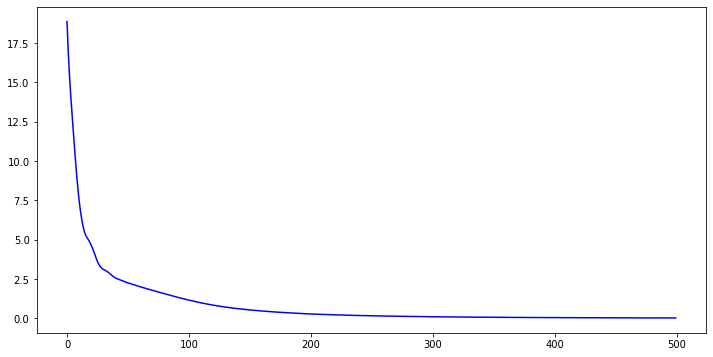

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(len(losses4)),losses4,color="blue")
plt.show()


In [32]:
model5 = Net(D_in,H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-4 * 2)

losses5 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model5(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses5.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 25.156341552734375
1 19.192201614379883
2 16.00217056274414
3 14.320691108703613
4 13.079429626464844
5 11.7260103225708
6 10.159533500671387
7 8.581501007080078
8 7.2950520515441895
9 6.476662635803223
10 6.063807487487793
11 5.813261032104492
12 5.54705286026001
13 5.305704593658447
14 5.194266319274902
15 5.117204666137695
16 4.880430221557617
17 4.464250564575195
18 4.019801616668701
19 3.684352397918701
20 3.45735764503479
21 3.2798912525177
22 3.1612796783447266
23 3.1457958221435547
24 3.1954047679901123
25 3.2086007595062256
26 3.151876926422119
27 3.0699751377105713
28 2.9929282665252686
29 2.903903007507324
30 2.801689863204956
31 2.727612018585205
32 2.698995590209961
33 2.6739604473114014
34 2.6229026317596436
35 2.564581871032715
36 2.5076141357421875
37 2.441350221633911
38 2.37734317779541
39 2.3378679752349854
40 2.316704273223877
41 2.2944109439849854
42 2.2671329975128174
43 2.2381207942962646
44 2.200300931930542
45 2.1534512042999268
46 2.1111960411071777
47 2.077

360 0.04589065536856651
361 0.04586052522063255
362 0.04521210864186287
363 0.04394347965717316
364 0.042540933936834335
365 0.041114214807748795
366 0.03994143381714821
367 0.039043184369802475
368 0.03844834119081497
369 0.03806902840733528
370 0.03784887492656708
371 0.037780068814754486
372 0.03788982704281807
373 0.03828126937150955
374 0.03909321501851082
375 0.040715090930461884
376 0.04345325753092766
377 0.04831436276435852
378 0.0553700290620327
379 0.06630199402570724
380 0.07762328535318375
381 0.08857809007167816
382 0.08706919848918915
383 0.07433312386274338
384 0.051382001489400864
385 0.03595258295536041
386 0.03693929687142372
387 0.048743557184934616
388 0.05837738886475563
389 0.055695559829473495
390 0.044800907373428345
391 0.03465186804533005
392 0.033240675926208496
393 0.03916792571544647
394 0.045256130397319794
395 0.04629640281200409
396 0.04126026853919029
397 0.03475800156593323
398 0.03115074336528778
399 0.031977832317352295
400 0.035411521792411804
401 

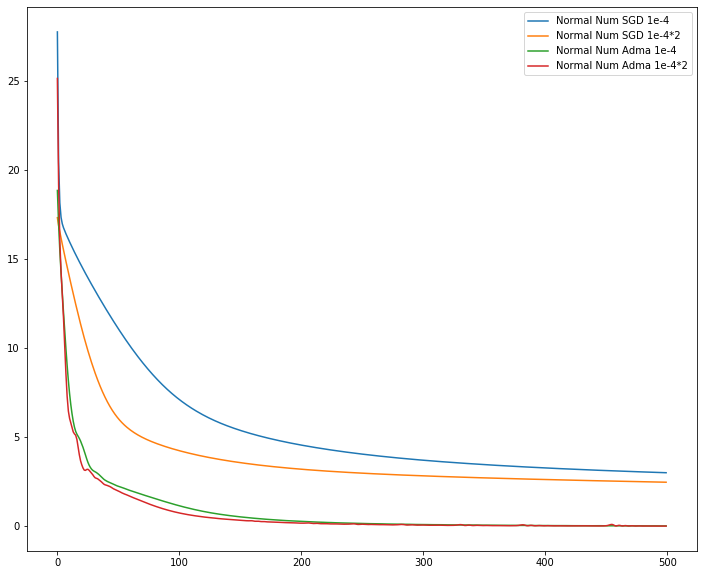

In [33]:
plt.figure(figsize=(12,10))
# plt.plot(range(len(losses1)),losses1,label = "NoNormal Num SGD 1e-4")
plt.plot(range(len(losses2)),losses2,label = "Normal Num SGD 1e-4")
plt.plot(range(len(losses3)),losses3,label = "Normal Num SGD 1e-4*2")
plt.plot(range(len(losses4)),losses4,label = "Normal Num Adma 1e-4")
plt.plot(range(len(losses5)),losses5,label = "Normal Num Adma 1e-4*2")
plt.legend()
plt.show()

In [34]:
concatDf["MSZoning"].fillna(method="ffill",inplace=True)

In [35]:
concatDf.iloc[concatDf["MasVnrType"].isnull().values == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,55.0,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,530,20,RL,229.0,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
231,1692,60,RL,90.0,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
246,1707,20,FV,90.0,7993,Pave,

In [36]:
def MasVnrTypeConv(col):
    MasVnrType = col[0]
    MasVnrArea = col[1]
    if pd.isnull(MasVnrType):
        if MasVnrArea == 0:
            return "None"
        else:
            return "BrkCmn"
    else:
        return MasVnrType

concatDf["MasVnrType"] = concatDf[["MasVnrType","MasVnrArea"]].apply(MasVnrTypeConv,axis=1)

In [37]:
for i in noNumCol:
    print("{:15}{}".format(i,len(concatDf[i][concatDf[i].isnull().values == True])))

MSZoning       0
Street         0
Alley          2721
LotShape       0
LandContour    0
Utilities      2
LotConfig      0
LandSlope      0
Neighborhood   0
Condition1     0
Condition2     0
BldgType       0
HouseStyle     0
RoofStyle      0
RoofMatl       0
Exterior1st    1
Exterior2nd    1
MasVnrType     0
ExterQual      0
ExterCond      0
Foundation     0
BsmtQual       81
BsmtCond       82
BsmtExposure   82
BsmtFinType1   79
BsmtFinType2   80
Heating        0
HeatingQC      0
CentralAir     0
Electrical     1
KitchenQual    1
Functional     2
FireplaceQu    1420
GarageType     157
GarageFinish   159
GarageQual     159
GarageCond     159
PavedDrive     0
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType       1
SaleCondition  0


In [38]:
for i in ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]:
    concatDf[i].fillna("N/A",inplace=True)
concatDf["KitchenQual"].fillna(method="ffill",inplace=True)
concatDf["Functional"].fillna(method="ffill",inplace=True)
concatDf["SaleType"].fillna(method="ffill",inplace=True)
concatDf["Electrical"].fillna(method="ffill",inplace=True)
concatDf["Exterior1st"].fillna(method="ffill",inplace=True)
concatDf["Utilities"].fillna(method="ffill",inplace=True)
concatDf["Exterior2nd"].fillna(method="ffill",inplace=True)


In [39]:
for i in noNumCol:
    print("{:15}{}".format(i,len(concatDf[i][concatDf[i].isnull().values == True])))

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
Neighborhood   0
Condition1     0
Condition2     0
BldgType       0
HouseStyle     0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
ExterQual      0
ExterCond      0
Foundation     0
BsmtQual       0
BsmtCond       0
BsmtExposure   0
BsmtFinType1   0
BsmtFinType2   0
Heating        0
HeatingQC      0
CentralAir     0
Electrical     0
KitchenQual    0
Functional     0
FireplaceQu    0
GarageType     0
GarageFinish   0
GarageQual     0
GarageCond     0
PavedDrive     0
PoolQC         0
Fence          0
MiscFeature    0
SaleType       0
SaleCondition  0


In [40]:
for i in noNumCol:
    concatDf[i] = i + concatDf[i]

In [41]:
cc = []
for i in noNumCol:
    tmpCol = pd.get_dummies(concatDf[i],drop_first=True)
    cc.append(tmpCol)
noNumDf = pd.concat(cc,axis= 1)

noNumDf.head()
    

,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyN/A,AlleyPave,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualN/A,BsmtQualTA,BsmtCondGd,BsmtCondN/A,BsmtCondPo,BsmtCondTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureN/A,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1N/A,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2N/A,BsmtFinType2Rec,BsmtFinType2Unf,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuN/A,FireplaceQuPo,FireplaceQuTA,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypeN/A,GarageFinishN/A,GarageFinishRFn,GarageFinishUnf,GarageQualFa,GarageQualGd,GarageQualN/A,GarageQualPo,GarageQualTA,GarageCondFa,GarageCondGd,GarageCondN/A,GarageCondPo,GarageCondTA,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCN/A,FenceGdWo,FenceMnPrv,FenceMnWw,FenceN/A,MiscFeatureN/A,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [42]:
x_train = noNumDf[:df_train.shape[0]]
y_train = df_train["SalePrice"]


In [43]:
model6 = Net(x_train.shape[1],H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-4 * 2)

losses6 = []
tensorX = torch.FloatTensor(x_train.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model6(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses6.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\anaconda\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 8.321626267031962e+16
1 8.321618536090829e+16
2 8.321609946156237e+16
3 8.32160736917586e+16
4 8.321603933202022e+16
5 8.321598779241267e+16
6 8.321593625280512e+16
7 8.321586753332838e+16
8 8.32157386843095e+16
9 8.321566137489818e+16
10 8.321557547555226e+16
11 8.32155239359447e+16
12 8.321540367686042e+16
13 8.321526623790694e+16
14 8.32150944392151e+16
15 8.321481097137357e+16
16 8.3214570453205e+16
17 8.321428698536346e+16
18 8.32138059490263e+16
19 8.3213496711381e+16
20 8.32129555455017e+16
21 8.32125174588375e+16
22 8.32117787244626e+16
23 8.321098845048013e+16
24 8.321021535636685e+16
25 8.320935636290765e+16
26 8.320835993049498e+16
27 8.320722605912883e+16
28 8.320610077769728e+16
29 8.320491536672358e+16
30 8.320379867522662e+16
31 8.320236415614976e+16
32 8.32007148887081e+16
33 8.319879074335949e+16
34 8.31970555765719e+16
35 8.31949080929239e+16
36 8.319272624953754e+16
37 8.319001183020646e+16
38 8.318767536799744e+16
39 8.318485786945126e+16
40 8.31814992050258e+16
4

322 1.3572817136123904e+16
323 1.3572685065879552e+16
324 1.3572539036991488e+16
325 1.3572384418168832e+16
326 1.3572227651862528e+16
327 1.357205907439616e+16
328 1.357189264441344e+16
329 1.3571716550754304e+16
330 1.3571546899546112e+16
331 1.357137724833792e+16
332 1.3571206523387904e+16
333 1.3571029355986944e+16
334 1.3570859704778752e+16
335 1.35707007909888e+16
336 1.3570535434747904e+16
337 1.3570377594699776e+16
338 1.3570230492069888e+16
339 1.3570085536923648e+16
340 1.356994380300288e+16
341 1.3569800995340288e+16
342 1.356967536754688e+16
343 1.3569546518528e+16
344 1.3569418743250944e+16
345 1.3569300631650304e+16
346 1.3569184667533312e+16
347 1.3569071924641792e+16
348 1.3568970992910336e+16
349 1.3568860397502464e+16
350 1.3568766981963776e+16
351 1.3568664976490496e+16
352 1.3568562971017216e+16
353 1.3568470629220352e+16
354 1.356837613993984e+16
355 1.3568291314335744e+16
356 1.3568196825055232e+16
357 1.3568114146934784e+16
358 1.3568025026363392e+16
359 1.356793

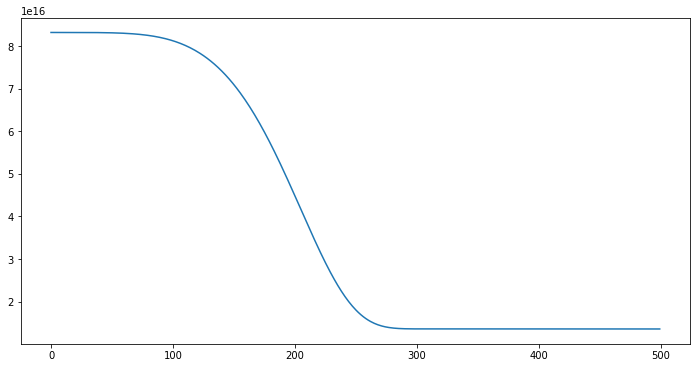

In [44]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(len(losses6)),losses6)

In [45]:
normalNumDf = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
normalNumDf.head()


,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyN/A,AlleyPave,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualN/A,BsmtQualTA,BsmtCondGd,BsmtCondN/A,BsmtCondPo,BsmtCondTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureN/A,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1N/A,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2N/A,BsmtFinType2Rec,BsmtFinType2Unf,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuN/A,FireplaceQuPo,FireplaceQuTA,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypeN/A,GarageFinishN/A,GarageFinishRFn,GarageFinishUnf,GarageQualFa,GarageQualGd,GarageQualN/A,GarageQualPo,GarageQualTA,GarageCondFa,GarageCondGd,GarageCondN/A,GarageCondPo,GarageCondTA,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCN/A,FenceGdWo,FenceMnPrv,FenceMnWw,FenceN/A,MiscFeatureN/A,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,-0.044521,-0.010959,0.211644,-0.149315,0.00411,0.062329,-0.028082,-0.028082,-0.006849,0.366438,-0.034247,-0.024658,0.102055,-0.000685,-0.064384,-0.032192,-0.00274,0.279452,-0.044521,-0.008904,-0.00137,-0.010959,-0.039726,-0.019178,0.89726,-0.034932,-0.068493,-0.05411,-0.025342,-0.011644,-0.033562,-0.15411,-0.006164,-0.05,-0.028082,-0.05274,-0.077397,-0.017123,-0.050685,-0.040411,-0.058904,-0.017123,-0.026027,-0.007534,-0.055479,0.136986,-0.005479,-0.013014,-0.007534,-0.017808,-0.00137,-0.003425,-0.00411,0.010274,-0.000685,-0.00137,-0.000685,-0.000685,-0.00137,

In [46]:
predictDf = (y_train - y_train.mean()) / (y_train.max() - y_train.min())
predictDf.head()

0    0.038299
1    0.000804
2    0.059129
3   -0.056827
4    0.095929
Name: SalePrice, dtype: float64

In [47]:
model7 = Net(x_train.shape[1],H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-4 * 2)

losses7 = []
tensorX = torch.FloatTensor(normalNumDf.values)
tensorY = torch.FloatTensor(predictDf.values)
for t in range(500):
    y_pred = model7(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses7.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\anaconda\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 27502.283203125
1 26308.06640625
2 26946.310546875
3 26384.978515625
4 25987.791015625
5 26076.06640625
6 26274.107421875
7 26291.583984375
8 26153.00390625
9 26005.380859375
10 25951.857421875
11 25995.8125
12 26066.01953125
13 26091.318359375
14 26056.75
15 25995.78125
16 25950.501953125
17 25941.423828125
18 25961.330078125
19 25987.654296875
20 26000.1875
21 25992.15234375
22 25970.23046875
23 25947.685546875
24 25935.57421875
25 25937.203125
26 25947.5859375
27 25957.62890625
28 25960.26953125
29 25954.31640625
30 25943.955078125
31 25935.173828125
32 25931.94921875
33 25934.30859375
34 25939.185546875
35 25942.748046875
36 25942.697265625
37 25939.22265625
38 25934.4921875
39 25930.984375
40 25930.146484375
41 25931.662109375
42 25933.904296875
43 25935.068359375
44 25934.380859375
45 25932.33984375
46 25930.189453125
47 25929.048828125
48 25929.21484375
49 25930.189453125
50 25931.021484375
51 25931.0625
52 25930.28515625
53 25929.1640625
54 25928.33984375
55 25928.162109375
5

444 25925.482421875
445 25925.484375
446 25925.482421875
447 25925.482421875
448 25925.482421875
449 25925.482421875
450 25925.48046875
451 25925.48046875
452 25925.48046875
453 25925.48046875
454 25925.48046875
455 25925.478515625
456 25925.478515625
457 25925.4765625
458 25925.4765625
459 25925.474609375
460 25925.474609375
461 25925.4765625
462 25925.474609375
463 25925.474609375
464 25925.4765625
465 25925.4765625
466 25925.474609375
467 25925.47265625
468 25925.474609375
469 25925.474609375
470 25925.4765625
471 25925.47265625
472 25925.47265625
473 25925.47265625
474 25925.4765625
475 25925.470703125
476 25925.47265625
477 25925.47265625
478 25925.47265625
479 25925.47265625
480 25925.470703125
481 25925.470703125
482 25925.470703125
483 25925.470703125
484 25925.470703125
485 25925.46875
486 25925.470703125
487 25925.470703125
488 25925.470703125
489 25925.46484375
490 25925.466796875
491 25925.466796875
492 25925.466796875
493 25925.466796875
494 25925.466796875
495 25925.46875

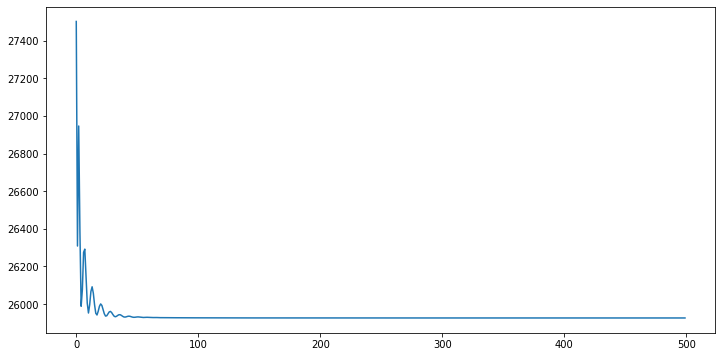

In [48]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(len(losses7)),losses7)

In [49]:
numDf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [50]:
noNumDf.head()

,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyN/A,AlleyPave,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualN/A,BsmtQualTA,BsmtCondGd,BsmtCondN/A,BsmtCondPo,BsmtCondTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureN/A,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1N/A,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2N/A,BsmtFinType2Rec,BsmtFinType2Unf,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuN/A,FireplaceQuPo,FireplaceQuTA,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypeN/A,GarageFinishN/A,GarageFinishRFn,GarageFinishUnf,GarageQualFa,GarageQualGd,GarageQualN/A,GarageQualPo,GarageQualTA,GarageCondFa,GarageCondGd,GarageCondN/A,GarageCondPo,GarageCondTA,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCN/A,FenceGdWo,FenceMnPrv,FenceMnWw,FenceN/A,MiscFeatureN/A,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [51]:
for i in numCol:
    if len(concatDf[concatDf[i].isnull().values == True]) != 0:
        print(i,len(concatDf[concatDf[i].isnull().values == True]))
 
print("#")
for i in noNumCol:
    if len(concatDf[concatDf[i].isnull().values == True]) != 0:
        print(i,len(concatDf[concatDf[i].isnull().values == True]))


SalePrice 1459
#


In [52]:
numDf.shape

(2919, 37)

In [53]:
noNumDf.shape

(2919, 223)

In [54]:
ccDF = pd.concat([numDf,noNumDf],axis=1)

In [55]:
ccDF.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyN/A,AlleyPave,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualN/A,BsmtQualTA,BsmtCondGd,BsmtCondN/A,BsmtCondPo,BsmtCondTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureN/A,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1N/A,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2N/A,BsmtFinType2Rec,BsmtFinType2Unf,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuN/A,FireplaceQuPo,FireplaceQuTA,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypeN/A,GarageFinishN/A,GarageFinishRFn,GarageFinishUnf,GarageQualFa,GarageQualGd,GarageQualN/A,GarageQualPo,GarageQualTA,GarageCondFa,GarageCondGd,GarageCondN/A,GarageCondPo,GarageCondTA,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCN/A,FenceGdWo,FenceMnPrv,FenceMnWw,FenceN/A,MiscFeatureN/A,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,1,0,0,0,1,0,0,1,

In [56]:
trainDf = ccDF[:1460]

In [57]:
allMeans = {}
allMaxs = {}
allMins = {}
for col in trainDf.columns:
    allMeans[col] = trainDf[col].mean()
    allMaxs[col] = trainDf[col].max()
    allMins[col] = trainDf[col].min()  


In [58]:
trainDf = (trainDf - trainDf.mean()) / (trainDf.max() - trainDf.min())
trainDf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyN/A,AlleyPave,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualN/A,BsmtQualTA,BsmtCondGd,BsmtCondN/A,BsmtCondPo,BsmtCondTA,BsmtExposureGd,BsmtExposureMn,BsmtExposureN/A,BsmtExposureNo,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1N/A,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2N/A,BsmtFinType2Rec,BsmtFinType2Unf,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuN/A,FireplaceQuPo,FireplaceQuTA,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypeN/A,GarageFinishN/A,GarageFinishRFn,GarageFinishUnf,GarageQualFa,GarageQualGd,GarageQualN/A,GarageQualPo,GarageQualTA,GarageCondFa,GarageCondGd,GarageCondN/A,GarageCondPo,GarageCondTA,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCN/A,FenceGdWo,FenceMnPrv,FenceMnWw,FenceN/A,MiscFeatureN/A,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0.018251,-0.007782,-0.009661,0.100076,-0.071918,0.229943,0.302237,0.058052,0.046485,-0.03158,-0.178613,-0.032967,-0.070360,0.245524,-0.010218,0.036650,0.191553,-0.0

In [59]:
y_train = trainDf["SalePrice"]
trainDf.drop(["SalePrice"],axis=1,inplace=True)

In [60]:
trainDf.shape

(1460, 259)

In [61]:
model8 = Net(trainDf.shape[1],H1,H2,H3,D_out)
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model8.parameters(), lr=1e-4 * 2)

losses8 = []
tensorX = torch.FloatTensor(trainDf.values)
tensorY = torch.FloatTensor(y_train.values)
for t in range(500):
    y_pred = model8(tensorX)
    loss = criterion(y_pred, tensorY)
    print(t,loss.item())
    losses8.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\anaconda\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 29122.998046875
1 26072.1484375
2 27095.708984375
3 27295.09765625
4 26605.52734375
5 26071.6171875
6 25990.70703125
7 26181.70703125
8 26362.734375
9 26390.8515625
10 26280.86328125
11 26119.837890625
12 25993.662109375
13 25948.775390625
14 25981.25390625
15 26048.2890625
16 26098.115234375
17 26101.158203125
18 26061.103515625
19 26003.7578125
20 25957.564453125
21 25939.0546875
22 25948.0
23 25971.609375
24 25993.30859375
25 26001.5703125
26 25993.560546875
27 25974.384765625
28 25953.189453125
29 25938.572265625
30 25934.869140625
31 25940.798828125
32 25950.8125
33 25958.400390625
34 25959.375
35 25953.642578125
36 25944.51171875
37 25936.412109375
38 25932.5
39 25933.33203125
40 25937.087890625
41 25940.94921875
42 25942.59375
43 25941.212890625
44 25937.673828125
45 25933.76953125
46 25931.208984375
47 25930.8125
48 25932.13671875
49 25933.96484375
50 25935.0
51 25934.630859375
52 25933.091796875
53 25931.248046875
54 25929.9765625
55 25929.703125
56 25930.259765625
57 25931.

448 25925.49609375
449 25925.49609375
450 25925.494140625
451 25925.49609375
452 25925.49609375
453 25925.49609375
454 25925.5
455 25925.498046875
456 25925.498046875
457 25925.498046875
458 25925.5
459 25925.5
460 25925.5
461 25925.5
462 25925.50390625
463 25925.50390625
464 25925.501953125
465 25925.50390625
466 25925.50390625
467 25925.501953125
468 25925.501953125
469 25925.50390625
470 25925.50390625
471 25925.50390625
472 25925.505859375
473 25925.50390625
474 25925.50390625
475 25925.50390625
476 25925.50390625
477 25925.50390625
478 25925.50390625
479 25925.505859375
480 25925.50390625
481 25925.505859375
482 25925.50390625
483 25925.505859375
484 25925.50390625
485 25925.5
486 25925.5
487 25925.5
488 25925.5
489 25925.5
490 25925.5
491 25925.5
492 25925.498046875
493 25925.498046875
494 25925.5
495 25925.5
496 25925.5
497 25925.5
498 25925.498046875
499 25925.498046875


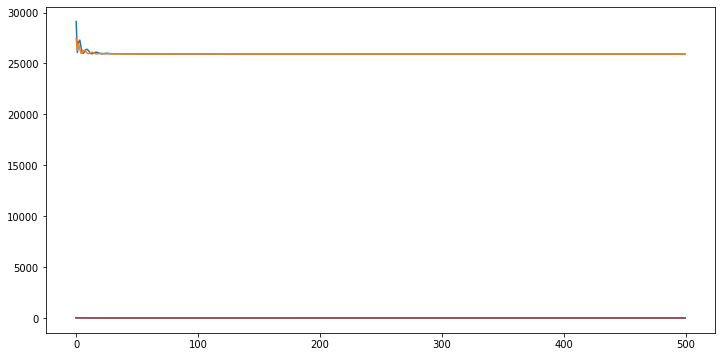

In [62]:
plt.figure(figsize=(12,6))
plt.plot(range(len(losses8)),losses8)
plt.plot(range(len(losses7)),losses7)
plt.plot(range(len(losses2)),losses2)
plt.plot(range(len(losses3)),losses3)
plt.plot(range(len(losses4)),losses4)
plt.plot(range(len(losses5)),losses5)

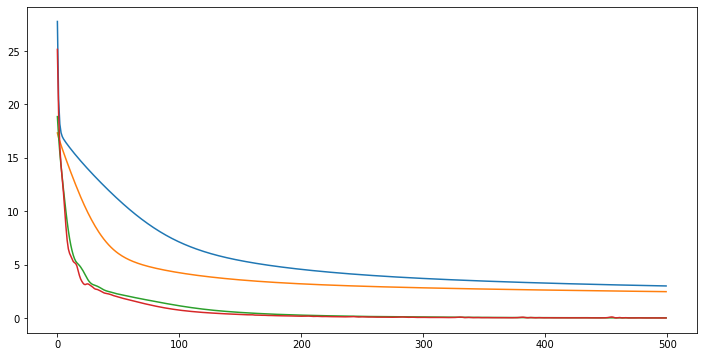

In [63]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(len(losses2)),losses2)
plt.plot(range(len(losses3)),losses3)
plt.plot(range(len(losses4)),losses4)
plt.plot(range(len(losses5)),losses5)


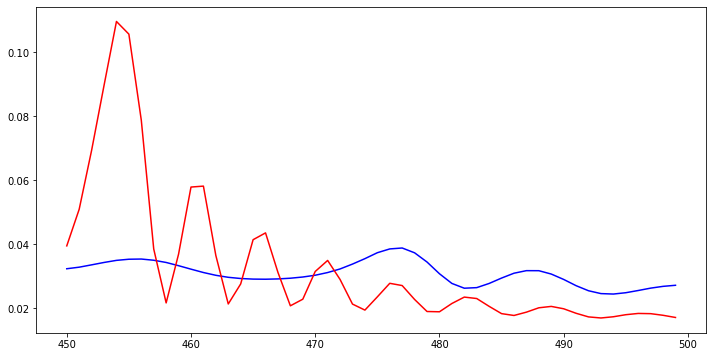

In [64]:
%matplotlib inline
plt.figure(figsize=(12,6))

plt.plot(range(len(losses4))[-50:],losses4[-50:],color = "blue")
plt.plot(range(len(losses5))[-50:],losses5[-50:],color = "red")

In [65]:
numDf = pd.DataFrame(concatDf,columns=numCol)

x_test = numDf[df_train.shape[0]:].iloc[:,:-1]


In [66]:
pd.DataFrame(concatDf,columns=numCol)[:df_train.shape[0]].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,73.886986,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,53.322382,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,13.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,82.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,1155.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
for i in x_test.columns:
    print("{:15}{:20f}{:20f}{:20f}".format(i,means[i],maxs[i], mins[i]))
    x_test[i] = (x_test[i] - means[i]) / (maxs[i] - mins[i])

MSSubClass                56.897260          190.000000           20.000000
LotFrontage               73.886986         1155.000000           13.000000
LotArea                10516.828082       215245.000000         1300.000000
OverallQual                6.099315           10.000000            1.000000
OverallCond                5.575342            9.000000            1.000000
YearBuilt               1971.267808         2010.000000         1872.000000
YearRemodAdd            1984.865753         2010.000000         1950.000000
MasVnrArea               103.117123         1600.000000            0.000000
BsmtFinSF1               443.639726         5644.000000            0.000000
BsmtFinSF2                46.549315         1474.000000            0.000000
BsmtUnfSF                567.240411         2336.000000            0.000000
TotalBsmtSF             1057.429452         6110.000000            0.000000
1stFlrSF                1162.626712         4692.000000          334.000000
2ndFlrSF    

In [68]:
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.217043,0.005353,0.005166,-0.122146,0.053082,-0.074404,-0.397763,-0.064448,0.004316,0.066113,-0.127243,-0.028712,-0.061181,-0.168035,-0.010218,-0.116704,-0.141781,-0.028767,-0.188356,-0.191438,-0.108305,-0.015525,-0.126484,-0.204338,0.045901,-0.191781,0.181255,0.053390,-0.085302,-0.039772,-0.006712,0.218623,-0.003738,-0.002806,-0.029265,0.546062
1,-0.217043,0.006229,0.017529,-0.011035,0.053082,-0.096144,-0.447763,0.003052,0.084933,-0.031580,-0.069024,0.044447,0.038177,-0.168035,-0.010218,-0.035129,-0.141781,-0.028767,-0.188356,0.308562,0.016695,-0.015525,-0.043151,-0.204338,0.044408,-0.191781,-0.113526,0.348606,-0.019489,-0.039772,-0.006712,-0.031377,-0.003738,0.803646,-0.029265,0.546062
2,0.018251,0.000099,0.015486,-0.122146,-0.071918,0.186465,0.218904,-0.064448,0.061545,-0.031580,-0.184178,-0.021183,-0.053838,0.171432,-0.010218,0.021390,-0.141781,-0.028767,0.144977,0.308562,0.016695,-0.015525,-0.043151,0.128995,0.063811,0.058219,0.006361,0.137404,-0.023145,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.301993,0.546062
3,0.018251,0.003602,-0.002519,-0.011035,0.053082,0.193712,0.218904,-0.051948,0.028058,-0.031580,-0.104127,-0.021511,-0.054297,0.160294,-0.010218,0.016680,-0.141781,-0.028767,0.144977,0.308562,0.016695,-0.015525,0.040183,0.128995,0.064309,0.058219,-0.002102,0.310100,-0.019489,-0.039772,-0.006712,-0.031377,-0.003738,-0.002806,-0.029265,0.546062
4,0.371193,-0.027046,-0.025763,0.211187,-0.071918,0.150233,0.118904,-0.064448,-0.032006,-0.031580,0.192534,0.036427,0.026933,-0.168035,-0.010218,-0.044360,-0.141781,-0.028767,0.144977,-0.191438,-0.108305,-0.015525,-0.126484,-0.204338,0.061324,0.058219,0.023286,-0.109970,0.064606,-0.039772,-0.006712,0.268623,-0.003738,-0.002806,-0.483811,0.546062


In [69]:
"SalePrice" in trainDf.columns

False

In [81]:
with torch.no_grad():
    test_result = model5(torch.FloatTensor(x_test.values))
# values, labels = torch.max(test_result, 1)
price = pd.DataFrame(test_result.data.numpy(),columns=["SalePrice"])
price["SalePrice"] = price['SalePrice'] * (maxs['SalePrice'] - mins['SalePrice']) + means['SalePrice']
idCol = pd.DataFrame(np.array(price.index),columns=["Id"])
idCol["Id"] = idCol["Id"] + 1461
price = pd.concat([idCol,price],axis=1)
price

,Id,SalePrice
0,1461,111767.031250
1,1462,163987.843750
2,1463,184890.937500
3,1464,199393.968750
4,1465,186555.859375
...,...,...
1454,2915,84917.289062
1455,2916,77978.273438
1456,2917,169220.421875
1457,2918,98526.226562


In [82]:
price.to_csv('./submission.csv', columns=['Id', 'SalePrice'], index=False)